# Exploratory Data Analysis in Python

A predictive model is only as good as the data it is built upon. This is why it is essential you carry out data cleaning steps such as we have seen in the previous two modules. But even if you have the cleanest data possible you are still going to have to explore the data to understand what is going on. While machine learning algorithms have the potential to transform our data analysis, they are not all powerful. You need to understand patterns within the data to get an idea of what will be useful in building the model.

In this notebook we will explore some techniques you can use when investigating your data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Throughout this Activate we will be using the college data we saw in module 8 to build a model which predicts graduate rates. You can read the documentation <a href='https://www.kaggle.com/datasets/yashgpt/us-college-data'>here</a> if you have forgotten what the fields are.

In [2]:
college=pd.read_csv('college_data.csv')
college.head()

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## Skew

In the previous module we learned how to identify the distribution of a dataset and check if it is skewed or not. Like with many of the hypothesis tests, predictive models often require that the data being used is normally distributed. This is because the skew of the data can influence the predictions a model makes. A model is only as good as the data it is built upon, and if the data is heavily skewed to one side the model will learn to favour that side as well when making predictions. 

Let's check the distribution of the graduate rate column:

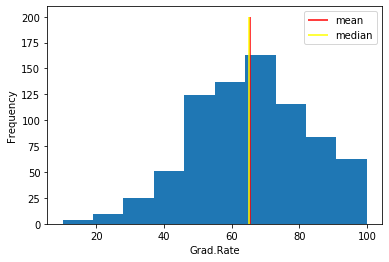

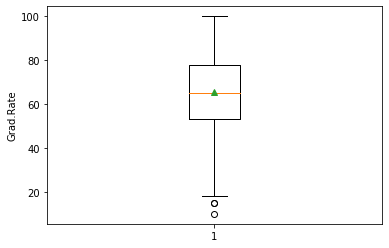

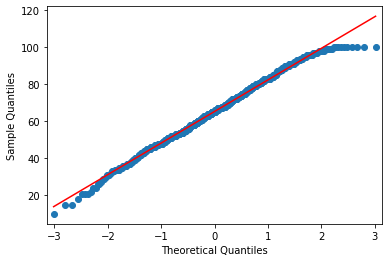

In [3]:
from statsmodels.graphics.gofplots import qqplot

grad = college['Grad.Rate']

plt.hist(grad)
plt.vlines(grad.mean(), ymin=0, ymax=200, color='red', label='mean')
plt.vlines(grad.median(), ymin=0, ymax=200, color='yellow', label='median')
plt.legend()
plt.xlabel('Grad.Rate')
plt.ylabel('Frequency')
plt.show()

plt.figure()
plt.boxplot(grad, showmeans=True)
plt.ylabel('Grad.Rate')

qqplot(grad, line='s')
plt.show()

The data seems to be normally distributed, we can check this further using a hypothesis test:

Null: The data is normally distributed<br>
Alternate: The data is not normally distributed

Check at 5% level

In [4]:
# D'Agostino's K^2 Test

from scipy.stats import normaltest

stat, p = normaltest(college['Grad.Rate'])
print(p)

0.07259743682937793


In this case we have insufficient evidence to reject the null hypothesis and conclude that our target feature is normally distributed.

It is isn't necessarily a problem if the target feature is skewed, as the model will adapt to it, but it can create issues later when trying to use the model for prediction. A potential solution can be to transform your data which you can read about <a href='https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/'>here</a>.

## Correlation

In module 8 we saw how to investigate if there is a correlation (relationship) between two variables, but how is it used in predictive modelling? If we are trying to predict something like a success rate or number of sales then using a variable we know has a strong correlation with the target is a good starting point. 

Using our college data we are going to (eventually) build a model that predicts graduation rate, but before we can do that we would like to see which of the other features are going to be useful in building our prediction by looking at correlations.

For example, let's investigate the correlation between graduation rate and the college's expenditure:

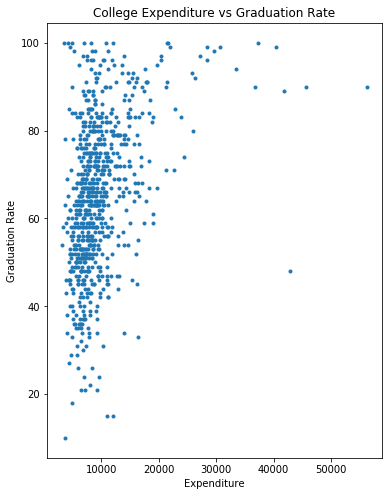

In [5]:
# Scatter Plot

fig, ax = plt.subplots(figsize=(6, 8))
ax.plot(college.Expend, college['Grad.Rate'], '.')
ax.set_title('College Expenditure vs Graduation Rate')
ax.set_xlabel('Expenditure')
ax.set_ylabel('Graduation Rate')
plt.show()

In [6]:
# Pandas has a function that calculates correlation coefficients 
college['Expend'].corr(college['Grad.Rate'])

0.3942485257356007

The correlation between expenditure and correlation is 0.39, indicating a weak positive relationship between the two features. But what about the other information in the data? It will be tedious to perform these steps for each possible predictive feature. This is where a correlation matrix comes in.

In [7]:
college.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


A correlation matrix finds the correlation coefficient for each possible pairing within the dataset. The feature we want to predidct, graduation rate, is the bottom row, and we can see Top10perc (what % of students were from the top % of their high school class). However, reading a table full of numbers is a bit boring. With a bit of seaborn magic, we can turn this into a viz that shows the same information:

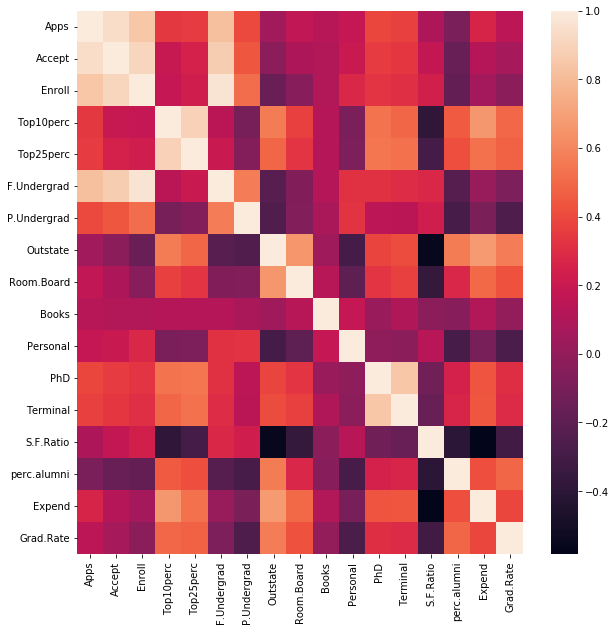

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(college.corr());

Darker boxes indicate stronger negative correlation while lighter boxes indicate stronger positive correlation. Looking at the bottom row (graduation rate) it appears Top10perc, Top25perc, Outstate, Expend and Room.Board may be the most useful features for predicting graduation rate.

However, just because two features are correlated doesn't mean it is actually useful. There are many examples of things which are correlated (show a relationship) but actually have nothing to do with each other (famous examples <a href='https://www.tylervigen.com/spurious-correlations'>here</a>). It is possible for two things to be correlated but not actually have a causal relationship.

Unfortunately, the data will not tell you this. You need to think about the correlation logically and check that the relationship makes sense. For example, there is a correlation between how much it costs to stay at the college (Room.Board) and its graduation rate but what does that actually mean? It is not going to be that if a college increases its accomodation costs the graduation rate goes up, but rather that college's which charge more for accomodation will have higher budgets and student support (which is not captured in this data). 

Something else we can use correlation matrices and heatmaps for is collinearity. This is when two predictive features have a high level of correlation between them. This creates an issue for a predictive model where these features will be predicting <b> each other </b> and not what you are actually trying to predict. If you spot two or more predictive features will high levels of collinearity, you should drop all but one for the actual model.

Another viz we can use to explore correlation and collinearity is a pairplot, which for each combination of variables creates a scatter plot. This will allow you to visually see where correlations occur. Note, this function can take a few minutes to run depending on the size of the dataset.

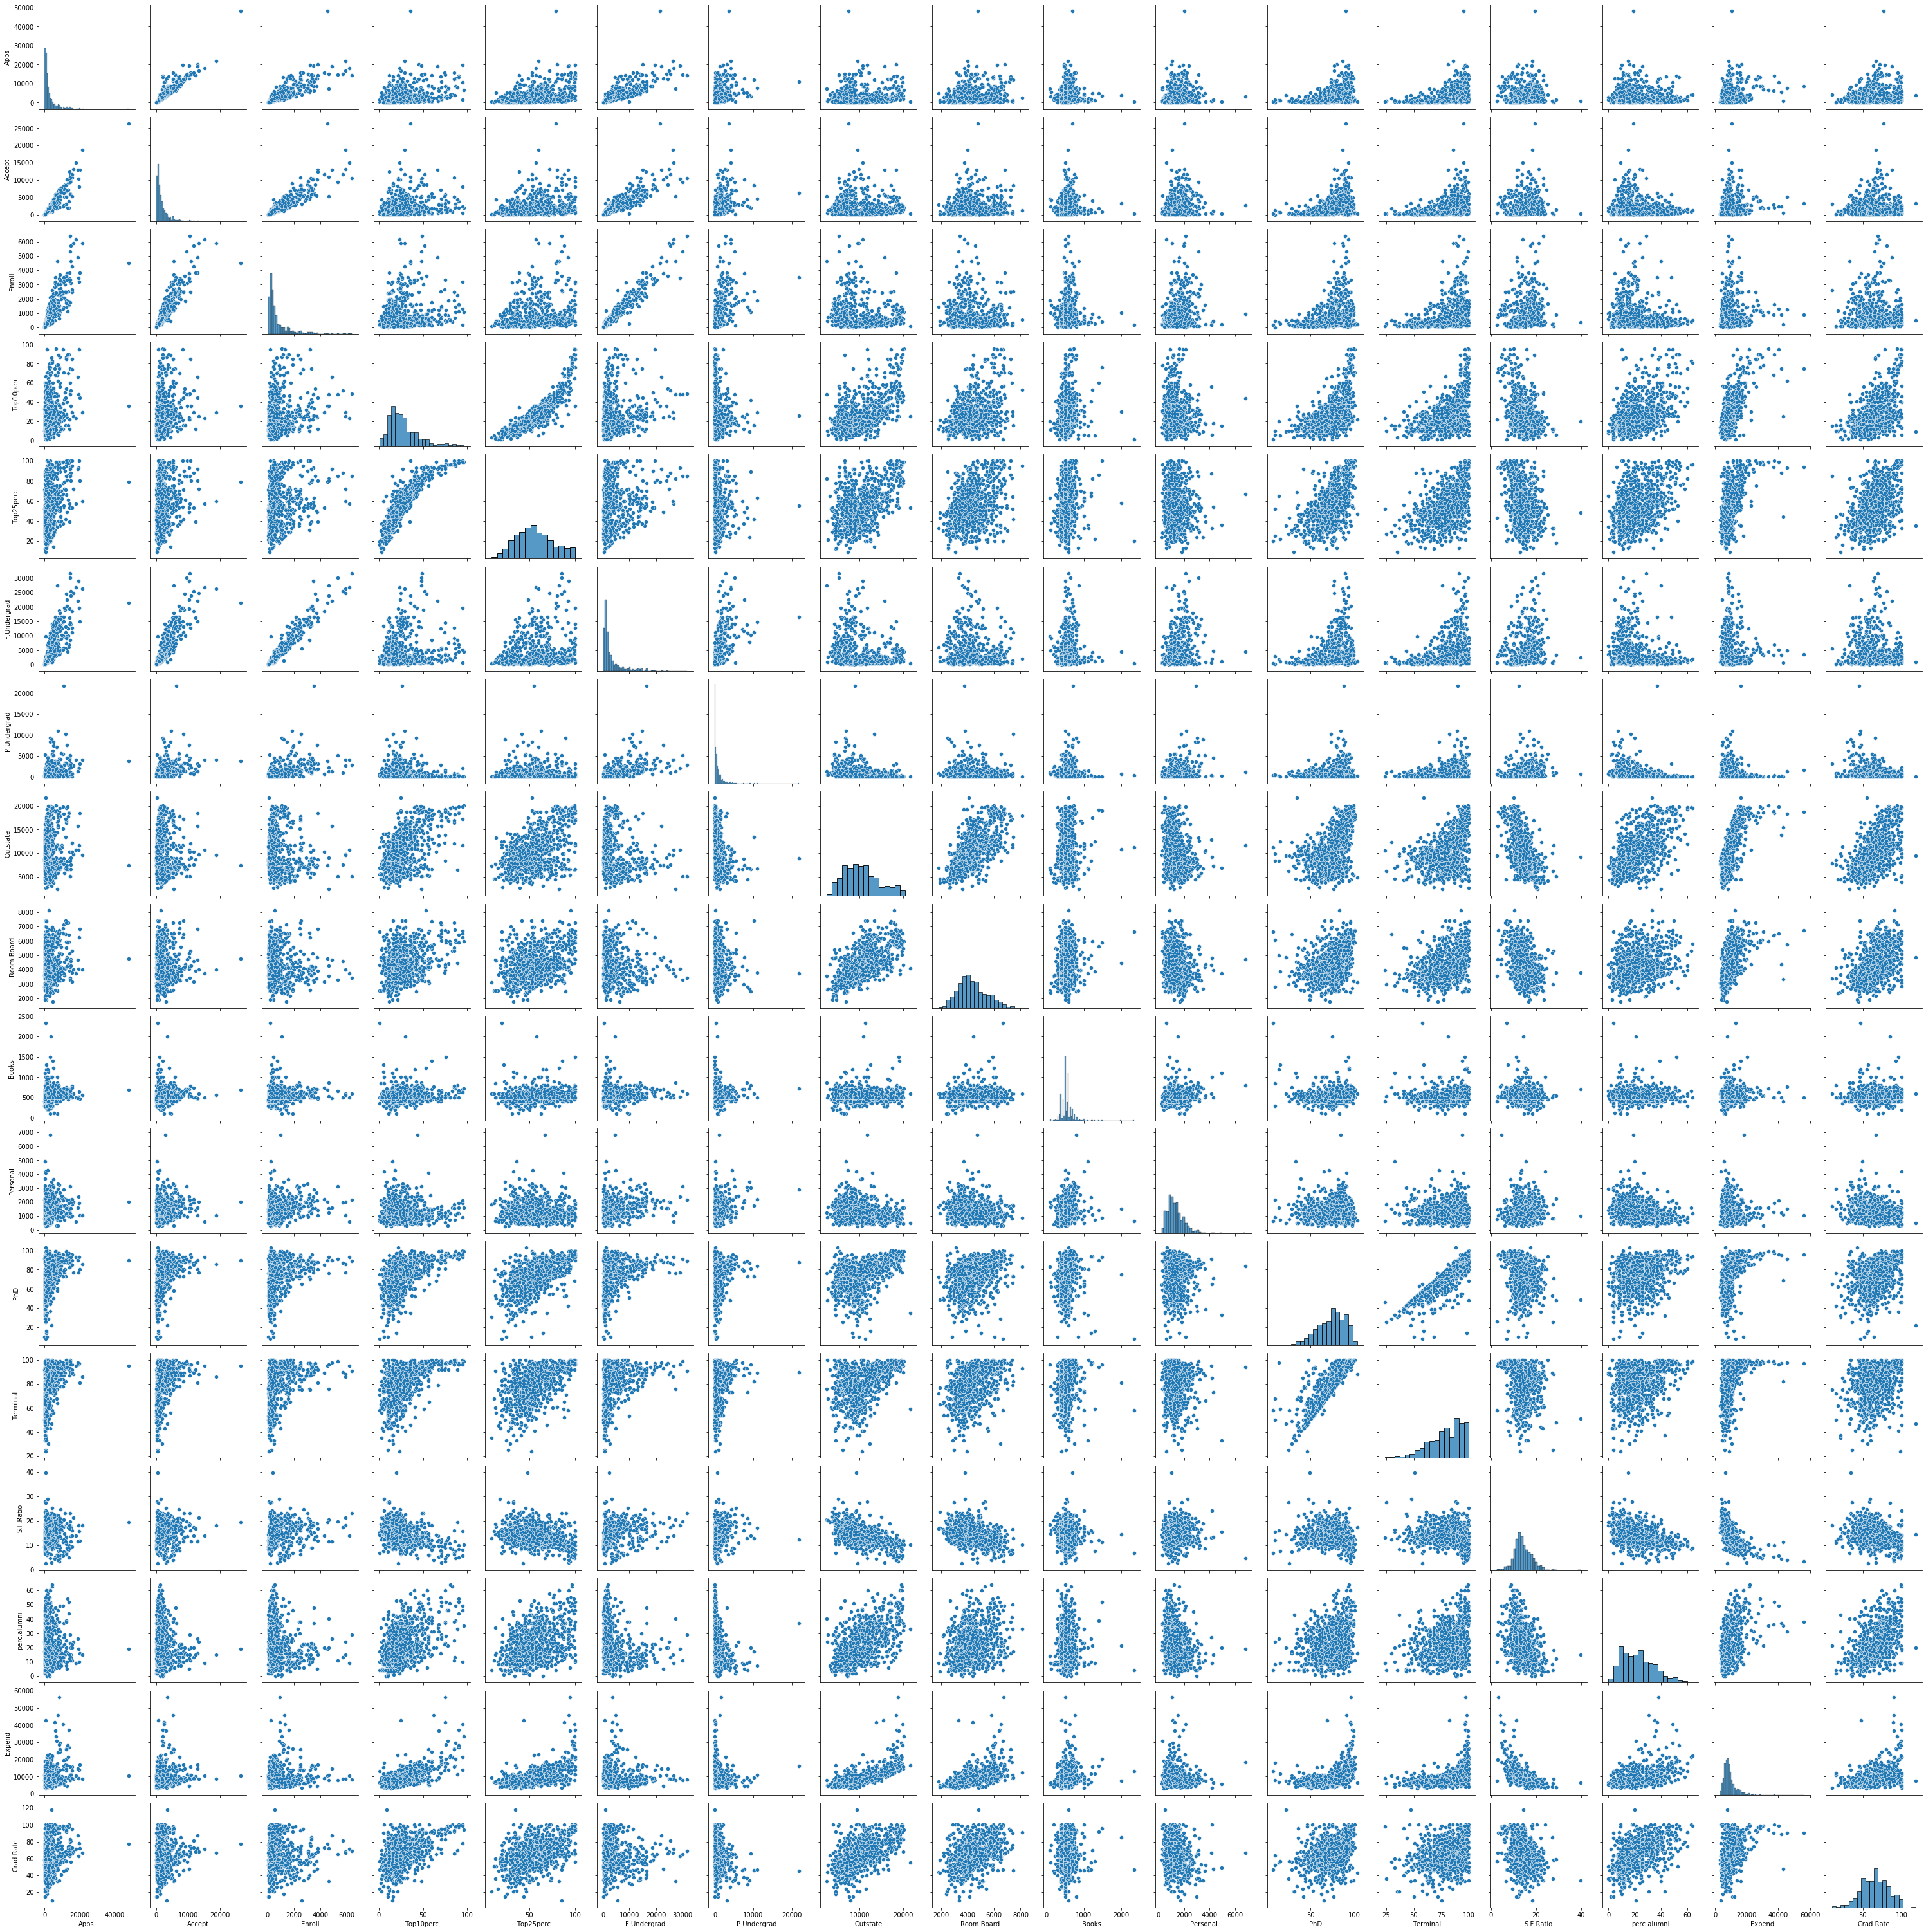

In [9]:
sns.pairplot(college)

# double click on the iz to enlarge.

## Summary Statistics

When evaluating how good a feature will be for prediction, it is useful to check out some of the summary statistics- specifically the standard deviation. Data that is more closely clustered together will perform better than data that is spread out.

We can calculate the standard deviation for each potential predictive feature individually, or we can visually inspect the distribution and spread using boxplots:

In [10]:
college.std()

Apps           3870.201484
Accept         2451.113971
Enroll          929.176190
Top10perc        17.640364
Top25perc        19.804778
F.Undergrad    4850.420531
P.Undergrad    1522.431887
Outstate       4023.016484
Room.Board     1096.696416
Books           165.105360
Personal        677.071454
PhD              16.328155
Terminal         14.722359
S.F.Ratio         3.958349
perc.alumni      12.391801
Expend         5221.768440
Grad.Rate        17.177710
dtype: float64

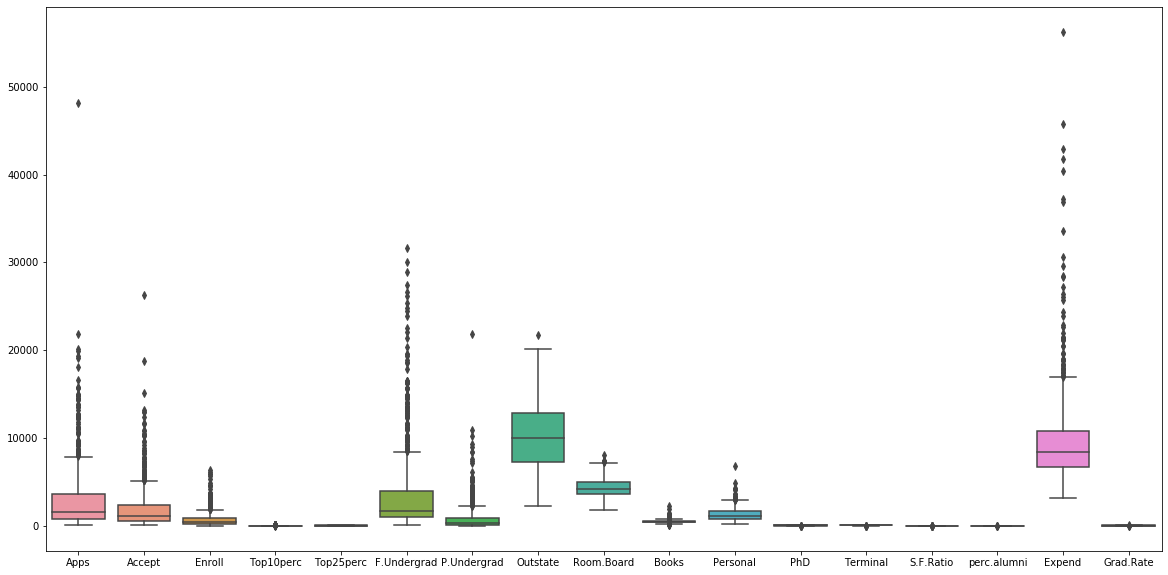

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=college);

Another advantage of this method is that it reveals outliers. Outliers within the predictors can influence the model, so it may be that you need to remove them. However, you need to investigate each outlier carefully as the result can be legitimate and should be included. Outliers should only be removed if they are clearly an error or have an overwhelming effect on your model.
 

## Dummy variables

The machine learning models we will be using in this module require that the predictive features are numeric, but what happens if you want to use something categorical? This is where we can use dummy variables. 

Let's look at an example, in our college data we have information on whether the college is private or not. The data is currently stored as "Yes" or "No" strings which is unusable in a model. However, it is not difficult to transform this feature so it is numeric- we can assign a value of 1 for yes and 0 for no:

In [7]:
pd.get_dummies(college.Private)

,No,Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
771,1,0
772,0,1
773,0,1
774,0,1


So now instead of having one column filled with "Yes" and "No", we now have two columns- one indicating if it is private and one indicating if it is not private, but isn't that saying the same thing?

Yes.

There is no need for two columns as we can understand from just one column if the college is private or not. To save us space then we can add an argument to the function which drops the extra column:

In [8]:
pd.get_dummies(college.Private,drop_first=True)

,Yes
0,1
1,1
2,1
3,1
4,1
...,...
771,0
772,1
773,1
774,1


We can then add this new column to our data:

Alternatively, we can build a new dataset with the dummies contained by adding the dataframe name to the function:

In [14]:
pd.get_dummies(college,columns=['Private'],drop_first=True)

,College,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1


In this example the column we made into dummies only had two option, but you can do use this function on any column which has any number of options. However, you should not use it on columns with hundreds of different options such as names or id values. This will create a dataset where the number of features will outnumber the amount of data you have, which will invalidate any predictive model you make.

## Practice

Load, clean and explore the Ames house prices dataset (dataset has had some columns dropped, you can find the original <a href='https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data'>here</a> and check what the column names mean.

In [9]:
house_df=pd.read_csv('ames_houses.csv')
house_df.head()

,SalePrice,LotFrontage,LotArea,Utilities,Neighborhood,YearBuilt,FullBath,HalfBath,BedroomAbvGr,GarageCars,GarageArea
0,208500,65.0,8450,AllPub,CollgCr,2003,2,1,3,2,548
1,181500,80.0,9600,AllPub,Veenker,1976,2,0,3,2,460
2,223500,68.0,11250,AllPub,CollgCr,2001,2,1,3,2,608
3,140000,60.0,9550,AllPub,Crawfor,1915,1,0,3,3,642
4,250000,84.0,14260,AllPub,NoRidge,2000,2,1,4,3,836


In [1]:
#1 Explore the data for cleaning issues, are there any null values, duplicates or outliers? Deal with them as you see fit.

In [2]:
#2 Explore the distribution of the SalePrice column, is it skewed in any way?

In [3]:
#3 Which feature is most correlated with SalePrice?

In [4]:
#4 Plot a pairplot to observe the correlation between each feature.

In [5]:
#5 Transform the Utilities and Neighborhood columns into dummy variables

In [6]:
#6 Save the dataset as a csv file called house_clean.csv